In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# # параметри виведення 
pd.set_option("display.max_columns", 500) # кількість колонок
pd.set_option("display.max_rows", 1000) # кількість рядків
pd.set_option("display.max_colwidth", 300) # ширина колонок
pd.set_option("display.precision", 7) # кількість знаків після коми

# # вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore") 

# # друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

df= pd.read_csv('facebook_ads_data.csv')

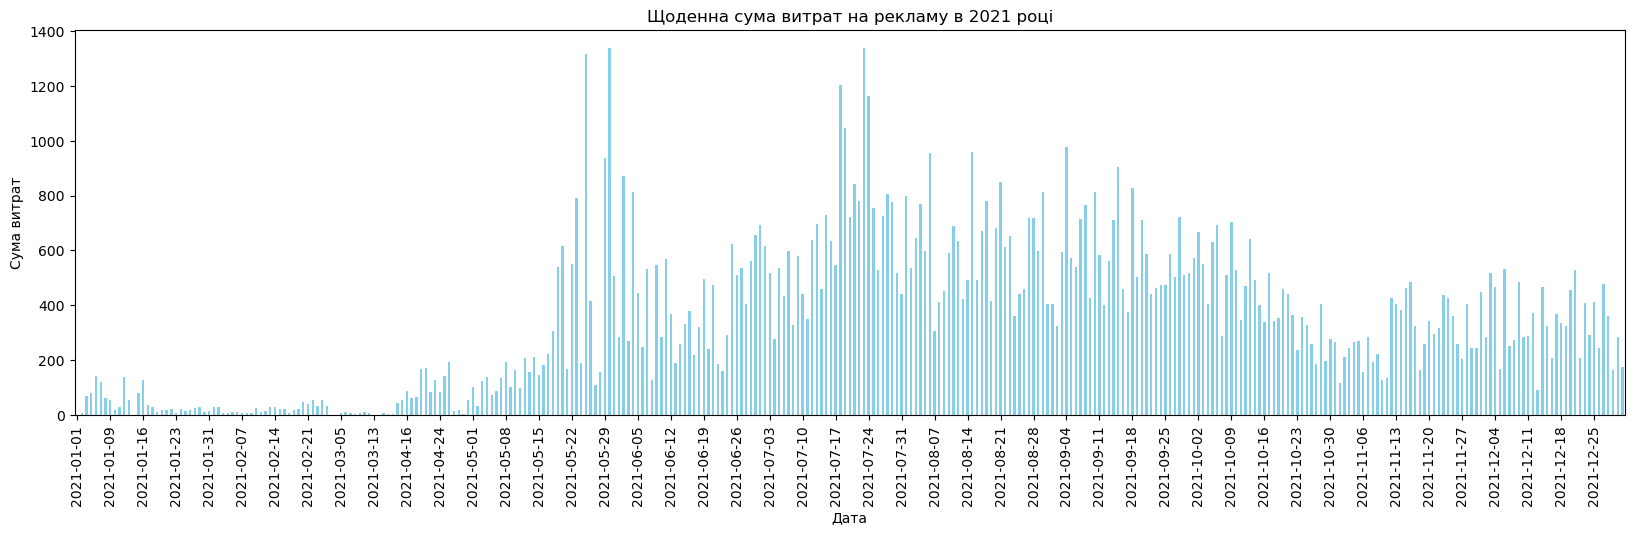

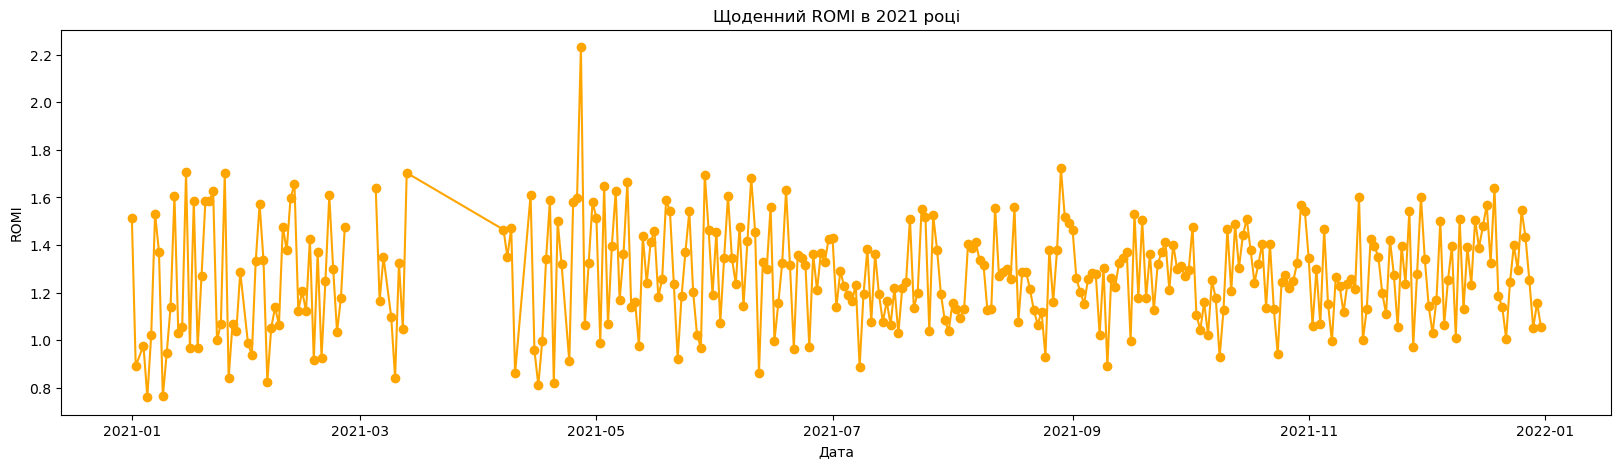

In [2]:
df['ad_date'] = pd.to_datetime(df['ad_date'])

df_2021 = df[df['ad_date'].dt.year == 2021]

#daily_grouped = df_2021.groupby(df_2021['ad_date'].dt.date)
daily_stats = df_2021.groupby(df_2021['ad_date'].dt.date)[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']

# Графік щоденної суми витрат
plt.figure(figsize=(20, 5))
daily_stats['total_spend'].plot(kind='bar', color='skyblue')
plt.title('Щоденна сума витрат на рекламу в 2021 році')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(daily_stats),7))
plt.show()

# Графік щоденного ROMI в 2021 році
plt.figure(figsize=(20, 5))
daily_stats['romi'].plot(kind='line', color='orange', marker='o')
plt.title('Щоденний ROMI в 2021 році')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.show()

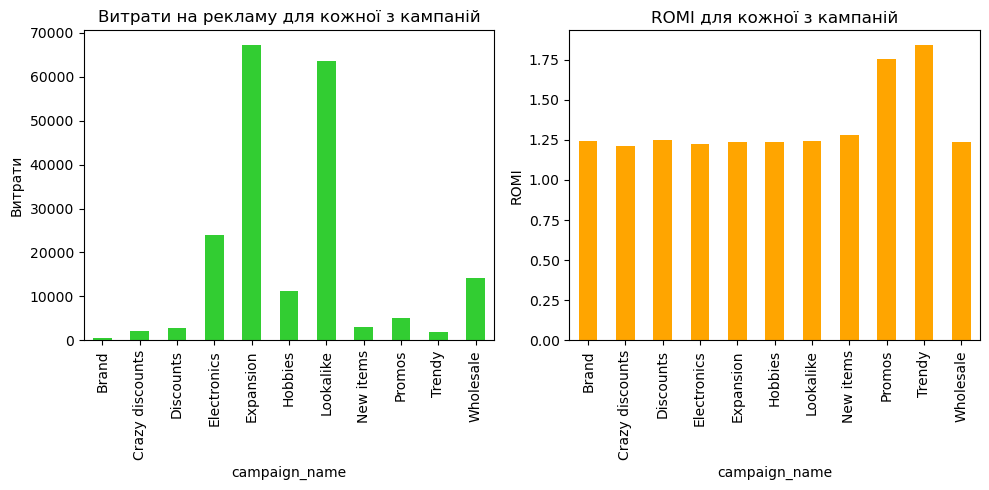

In [3]:
grouped_campaign = df.groupby('campaign_name')
fig,axes= plt.subplots(1,2,figsize=(10,5))

sum_spend = grouped_campaign['total_spend'].sum()
sum_spend.plot(kind='bar', color ='limegreen',ax=axes[0])
axes[0].set_title('Витрати на рекламу для кожної з кампаній')
axes[0].set_ylabel("Витрати")

sum_spend = grouped_campaign['romi'].mean()
sum_spend.plot(kind='bar', color ='orange',ax=axes[1])
axes[1].set_title('ROMI для кожної з кампаній')
axes[1].set_ylabel("ROMI")

plt.tight_layout()
plt.show()

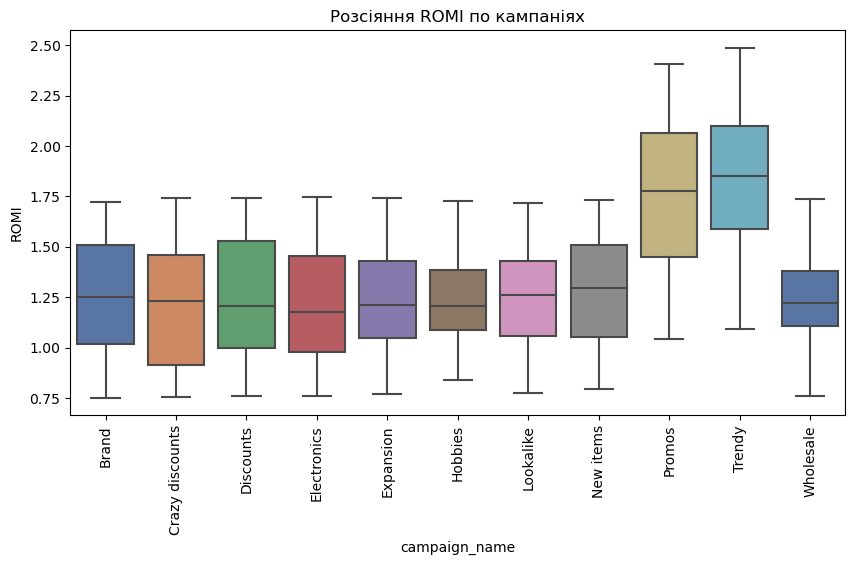

      campaign_name  max_romi  min_romi
0             Brand      1.72      0.75
1   Crazy discounts      1.74      0.75
2         Discounts      1.74      0.76
3       Electronics      1.75      0.76
4         Expansion      1.74      0.77
5           Hobbies      1.73      0.84
6         Lookalike      1.72      0.78
7         New items      1.73      0.79
8            Promos      2.41      1.04
9            Trendy      2.49      1.09
10        Wholesale      1.74      0.76


In [4]:
grouped_campaign_date=df.groupby(['campaign_name','ad_date'])[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
grouped_campaign_date['romi'] = grouped_campaign_date['total_value'] / grouped_campaign_date['total_spend']
grouped_campaign_date = grouped_campaign_date.reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(x='campaign_name',y='romi',data=grouped_campaign_date, palette='deep')
plt.title('Розсіяння ROMI по кампаніях')
plt.ylabel('ROMI')
plt.xticks(rotation=90)



max_grouped_campaign = round(grouped_campaign_date.groupby('campaign_name')['romi'].max(),2)
min_grouped_campaign = round(grouped_campaign_date.groupby('campaign_name')['romi'].min(),2)

mix_max_values = pd.DataFrame({'campaign_name': max_grouped_campaign.index, 'max_romi': max_grouped_campaign.values, 'min_romi': min_grouped_campaign.values})

plt.show()
print(f'{mix_max_values}')

<Figure size 1000x500 with 0 Axes>

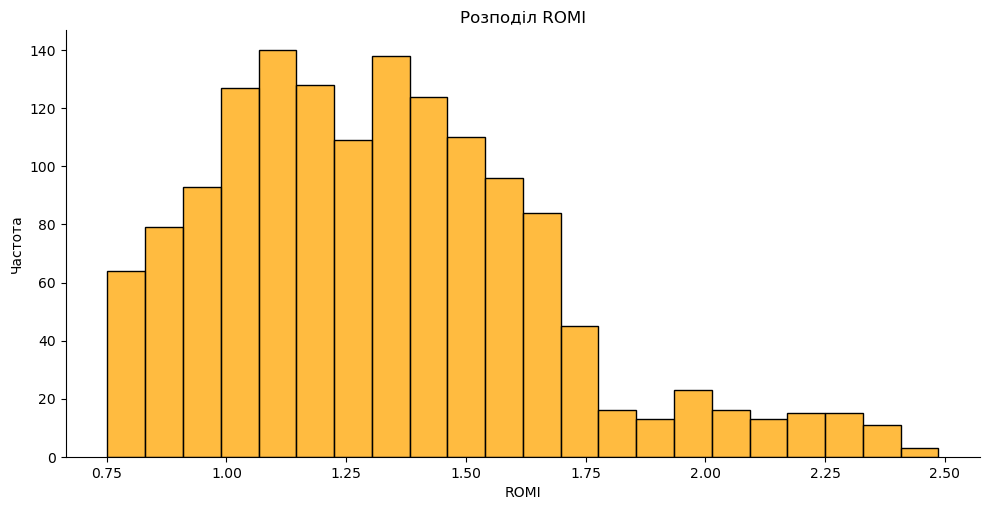

In [5]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x="romi",color='orange',edgecolor='black',aspect=2)
plt.title('Розподіл ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.show()

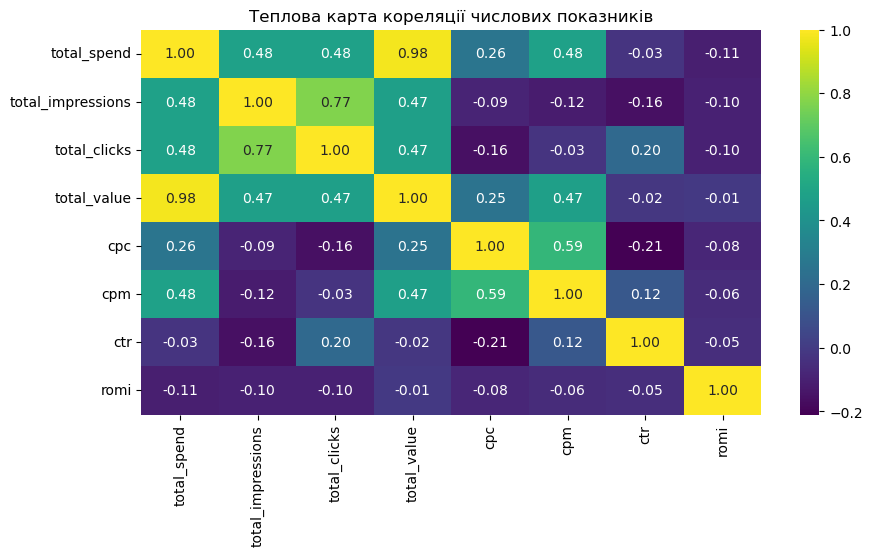

Найбільша кореляція між total_spend та total_value становить 0.98. 
Найменша кореляція між cpc та ctr становить -0.21.
total_value найбільше корелює з total_spend(0.98) 
також є значна кореляція між total_value та total_impressions(0.47), total_clicks(0.47), cpm(0.47)


In [6]:
plt.figure(figsize=(10,5))
correlation_matrix = round(df[['total_spend','total_impressions','total_clicks','total_value','cpc','cpm','ctr','romi']].corr(),2)
sns.heatmap(correlation_matrix, annot=True,cmap='viridis',fmt='.2f')
plt.title('Теплова карта кореляції числових показників')
plt.show()

print('''Найбільша кореляція між total_spend та total_value становить 0.98. 
Найменша кореляція між cpc та ctr становить -0.21.
total_value найбільше корелює з total_spend(0.98) 
також є значна кореляція між total_value та total_impressions(0.47), total_clicks(0.47), cpm(0.47)''')

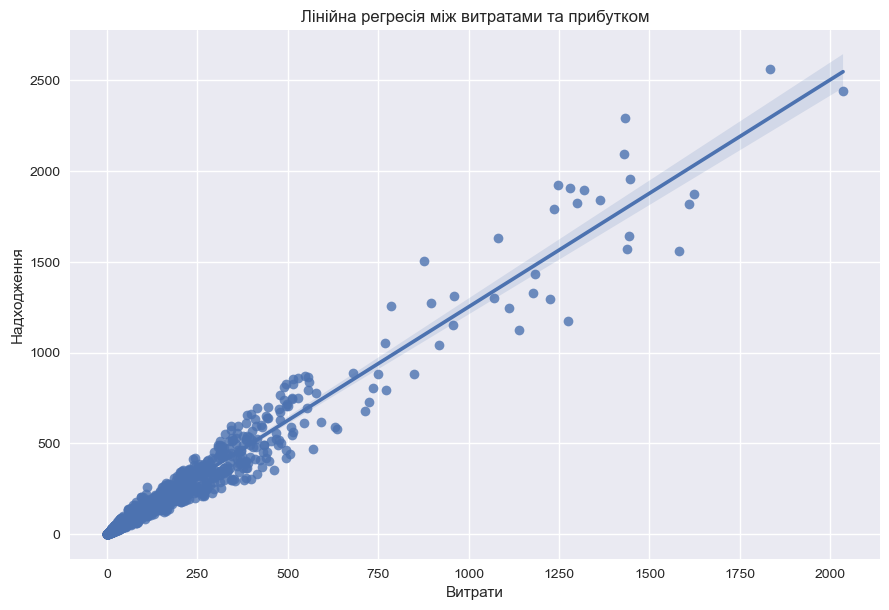

In [12]:

sns.lmplot(x='total_spend',y='total_value', data=df,height=6,aspect=1.5)
plt.title('Лінійна регресія між витратами та прибутком')
plt.xlabel('Витрати')
plt.ylabel('Надходження')
plt.show()

In [9]:
df = data.groupby('ad_date') ['total_spend'].sum()

plt.plot(df["ad_date"], df ["total_spend"])
label= "Total advertising spend in 2021"
plt.show()

NameError: name 'data' is not defined